#Importing necessary library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset

In [7]:
df = pd.read_csv("/content/mymoviedb.csv",lineterminator='\n')

In [8]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


• looks like our dataset has no NaNs! • Overview, Original_Language and Poster-Url
wouldn't be so useful during analysis • Release_Date column needs to be casted into
date time and to extract only the year value

In [12]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


• genres are saperated by commas followed by whitespaces.

#checkng dupicate values

In [13]:
df.duplicated().sum()

np.int64(0)

No Duplicate values present in dataset

In [14]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


*Exploration Summary

*we have a dataframe consisting of 9827 rows and 9 columns.
*our dataset looks a bit tidy with nor duplicated values.

*Release_Date column needs to be casted into date time and to extract only the year value.

*Overview, Original_Languege and Poster-Url useful during analysis, so we'll drop them.

*there is noticable outliers in Popularity column

*Vote Average bettter be categorised for proper analysis.

*Genre column has comma saperated values and white spaces that needs to be handled and casted into category. Exploration Summary

# Data Cleaning


Casting Release_Date column and extracing year values

In [15]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [16]:
# casting column a
df['Release_Date'] =df['Release_Date'].dt.year
# confirming changes
df['Release_Date'].dtypes

dtype('int32')

In [17]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#Dropping Overview, Original_Languege and Poster-Url

In [31]:
cols =['Overview','Original_Language','Poster_Url']

In [32]:
df.drop(cols, axis=1, inplace=True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**categorizing Vote_Average column**

We would cut the vote_Average values and make 4 categories: **popular** **average** **below_avg** **not_popular** to describe it more using function **catigorize_col()**
provided above,

In [44]:
def catigorize_col(df, col, labels):
    stats = df[col].describe()

    # Define bin edges using quartiles and min/max
    edges = [stats['min'], stats['25%'], stats['50%'], stats['75%'], stats['max']]
    edges = sorted(set(edges))  # Remove any duplicate bin edges

    # Ensure labels count matches the number of bins
    if len(edges) - 1 != len(labels):
        print(f"Warning: Number of bins ({len(edges)-1}) doesn't match number of labels ({len(labels)}).")
        labels = labels[:len(edges) - 1]

    # Apply categorization
    df[col] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True)
    return df


In [45]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = catigorize_col(df, 'Vote_Average', labels)

print(df['Vote_Average'].unique())


['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [46]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [47]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2567
popular,2450
average,2412
below_avg,2398


In [52]:
df.dropna(inplace = True)

df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [50]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


#we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [53]:
df['Genre'] = df['Genre'].str.split(', ')

df =df .explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


#Casting column in cateogy

In [55]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [57]:
df.nunique()

,0
Release_Date,102
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,19


#DATA Visualization

In [59]:
sns.set_style('whitegrid')

In [60]:
df['Genre'].describe()

,Genre
count,25793
unique,19
top,Drama
freq,3744


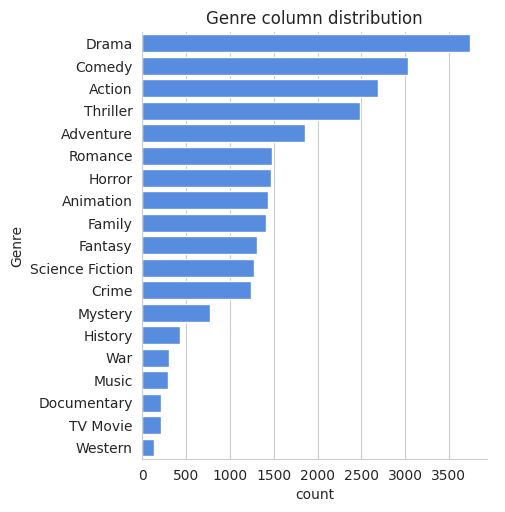

In [61]:
sns.catplot(y = 'Genre',data =df ,kind ='count',
            order= df['Genre'].value_counts().index,color ='#4287f5')
plt.title('Genre column distribution')
plt.show()

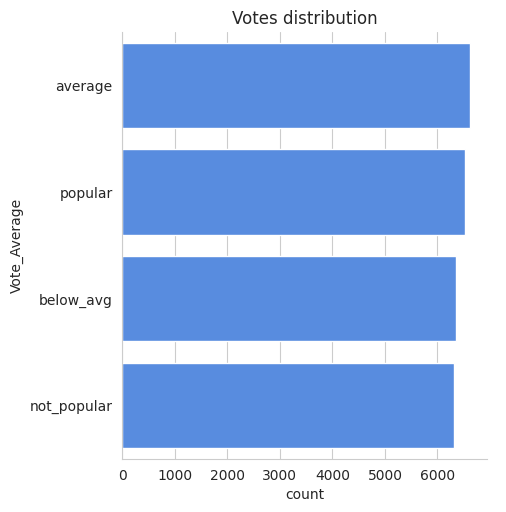

In [62]:
sns.catplot(y = 'Vote_Average',data =df ,kind ='count',
            order= df['Vote_Average'].value_counts().index,color ='#4287f5')
plt.title('Votes distribution')
plt.show()

In [63]:
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [64]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


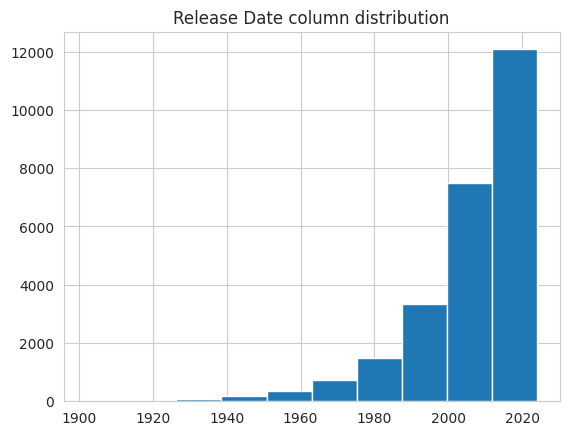

In [65]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.show()

This project involves **exploratory data analysis (EDA)** on a Netflix dataset containing over** 9,000** movies. The primary goal is to derive insights from the data that can support informed **decision-making** for Netflix, especially in the context of enhancing **recommendation systems** and understanding content trends. The analysis includes identifying top **genres**, **voting** ,**patterns**,**popularity trends**, and **production frequency by year**.

#Most frequent genre on Netflix:
➤ Drama

#Highest vote average movie:
➤ We have 25.5% of our dataset with population vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies Popularities.

#Movie with highest popularity & its genre:
➤  Spider-Man: No Way Home – Genres: Action, Adventure, Science Fiction

#Movie with lowest popularity & its genre:
➤ The United States vs. Billie Holiday and Threads – Genres: Music, Drama, History, War, Science Fiction

#Year with the most movies filmed:
➤ 2020
